In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_style_sheet
import numpy as np
import vice
import sys
import os
print(sys.version_info[:])
load_style_sheet("papers")

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/version.py:137: VersionWarning: Using an un-released version of VICE.
  if not self.isreleased: warnings.warn("""\


(3, 12, 3, 'final', 0)


In [8]:
def snia_dtd(t):
    if t < 0.15:
        return 0
    else:
        return t**-1.1

In [9]:
vice.yields.ccsne.settings['o'] = vice.solar_z['o']
vice.yields.sneia.settings['o'] = 0
vice.yields.ccsne.settings['fe'] = 0.35 * vice.solar_z['fe']
vice.yields.sneia.settings['fe'] = 0.65 * vice.solar_z['fe']

In [10]:
reconstructed_ia_dtd = vice.channel(snia_dtd, yields = {"fe": vice.yields.sneia.settings['fe']})

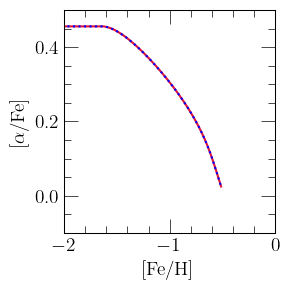

In [12]:
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-2, 0])
ax.set_ylim([-0.1, 0.5])

with vice.singlezone(name = "test", func = lambda t: 5, mode = "sfr") as orig:
    orig.channels = ["ccsne", "sneia"]
    out = orig.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"])

with vice.singlezone(name = "test", func = lambda t: 5, mode = "sfr") as test:
    test.channels = ["ccsne", reconstructed_ia_dtd]
    out = test.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["blue"], linestyle = ":")

plt.tight_layout()
plt.show()